In [1]:
!pip install -Uqq fastai duckduckgo_search


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflo

In [2]:
from fastcore.all import *
import time
import json

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')    
    headers = dict( referer='https://duckduckgo.com/' )
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        res = urlread(requestUrl, data=params, headers=headers)
        data = json.loads(res) if res else {}
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

urls = search_images('bird photos', max_images=1)
urls[0]


# dir(Image)

'http://4.bp.blogspot.com/-t1ypdIxiOo8/UKrx8dUZa6I/AAAAAAAANw0/LHNYgZr_lgk/s1600/Love+Birds+Wallpapers+04.jpg'

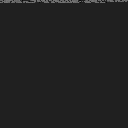

In [3]:
from PIL import Image
#from fastai import open_image

dir(Image)

def text_to_image(text, img_file):
    width = 128
    padded_text = text.ljust(width**2, ' ')
    raw = bytes(padded_text, 'utf-8')
    im = Image.frombytes('L', (width, width), raw)
    im.save(img_file, 'png')
    

# test
import inspect
source = inspect.getsource(inspect.getsource)
text_to_image(source, 'python.png')

from IPython.display import Image as show_image
show_image('python.png')
